In this example, we will load the residual map of a fit from a .fits file and plot it using the function autolens.data.plotters.array_plotters.plot_array.

We will use the residuals of a fit to slacs1430+4105, which comes from running the example pipeline '_workspacde/pipelines/examples/lens_light_and_x1_source_parametric.py_.

We have included the .fits data required for this example in the directory '_workspace/output/example/slacs1430+4105/pipeline_light_and_x1_source_parametric/phase_3_both/image/fits_'.

However, the complete set of optimizer results for the pipeline are not included, as the large file sizes prohibit distribution. Therefore, you may wish to run this pipeline now on slacs1430+4105 to generate your own results.

We will customize the appearance of this figure to highlight the features of the residual map.


In [1]:
from autolens.data.array import scaled_array
from autolens.data.array.plotters import array_plotters

First, lets setup the path to the .fits file of the residual map.

In [2]:
# If you are using Docker, the path to the workspace is as follows (e.g. comment out this line)!
# path = '/home/user/workspace/'

# If you arn't using docker, you need to change the path below to the workspace directory and uncomment it
# path = '/path/to/workspace/'

path = '/home/jammy/PyCharm/Projects/AutoLens/workspace/'

lens_name = 'slacs1430+4105'
pipeline_name = 'pipeline_lens_light_and_x1_source_parametric'
phase_name = 'phase_3_both'

residual_map_path = path+'/output/example/'+lens_name+'/'+pipeline_name+'/'+phase_name+'/image/fits/fit_residual_map.fits'

Now, lets load this image as a scaled array. A scaled array is an ordinary NumPy array, but it also includes a pixel scale which allows us to convert the axes of the image to arc-second coordinates.

In [3]:
residual_map = scaled_array.ScaledSquarePixelArray.from_fits_with_pixel_scale(file_path=residual_map_path, hdu=0,
                                                                              pixel_scale=0.04)

We can now use an array plotter to plot the residual map.

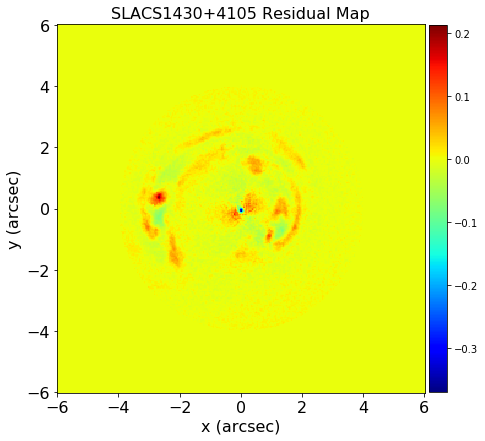

In [4]:
array_plotters.plot_array(array=residual_map, title='SLACS1430+4105 Residual Map')

A useful way to really dig into the residuals is to set upper and lower limits on the normalization of the colorbar.

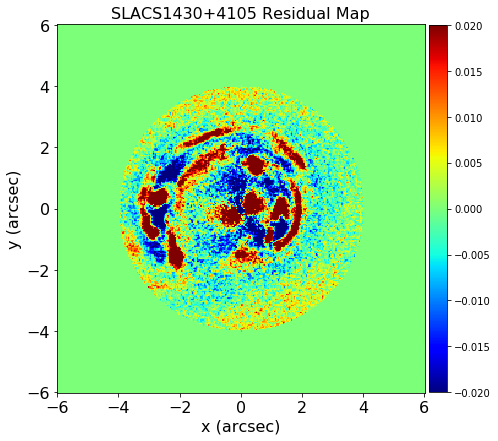

In [5]:
array_plotters.plot_array(array=residual_map, title='SLACS1430+4105 Residual Map',
                          norm_min=-0.02, norm_max=0.02)

Or, alternatively, use a symmetric logarithmic colormap

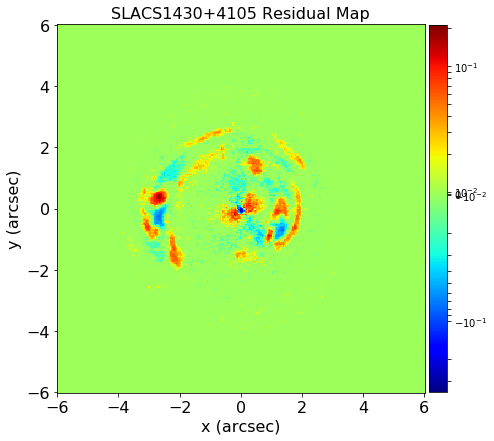

In [6]:
array_plotters.plot_array(array=residual_map, title='SLACS1430+4105 Residual Map',
                          norm='symmetric_log', linthresh=0.01, linscale=0.02)

These tools are equally powerful ways to inspect the chi-squared map of a fit.

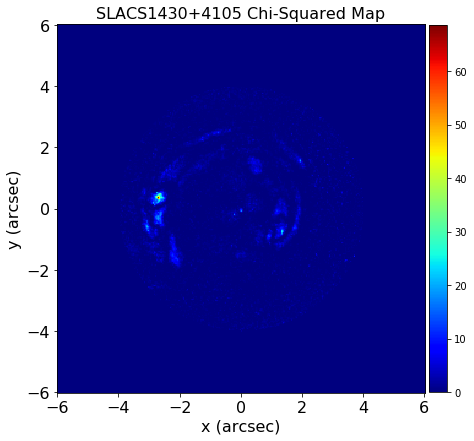

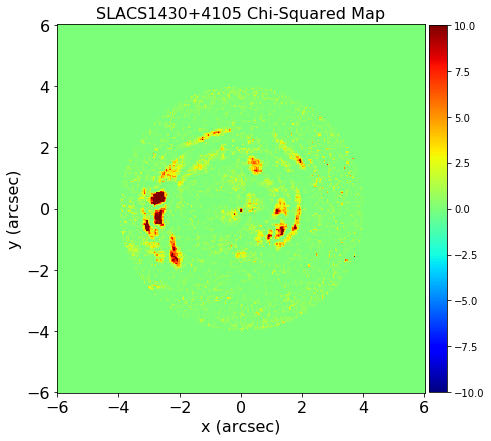

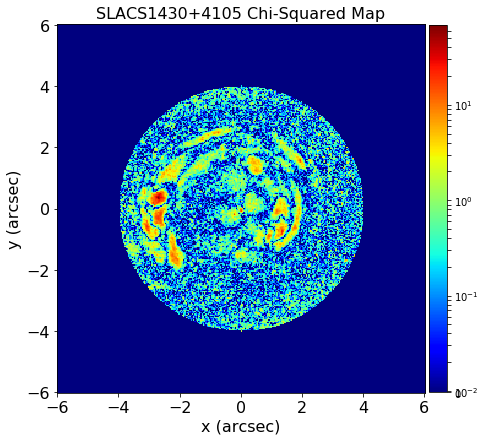

In [7]:
chi_squared_map_path = \
    path+'/output/example/'+lens_name+'/'+pipeline_name+'/'+phase_name+'/image/fits/fit_chi_squared_map.fits'
chi_squared_map = scaled_array.ScaledSquarePixelArray.from_fits_with_pixel_scale(file_path=chi_squared_map_path, hdu=0,
                                                                                 pixel_scale=0.04)
array_plotters.plot_array(array=chi_squared_map, title='SLACS1430+4105 Chi-Squared Map')
array_plotters.plot_array(array=chi_squared_map, title='SLACS1430+4105 Chi-Squared Map', norm_min=-10.0, norm_max=10.0)
array_plotters.plot_array(array=chi_squared_map, title='SLACS1430+4105 Chi-Squared Map',
                          norm='symmetric_log', linthresh=0.01, linscale=0.02)

We can also plot the results of a fit using the fit itself. To do this, we have to make the pipeline and run it so as to load up all the results of the pipeline. We can then access the results of every phase.

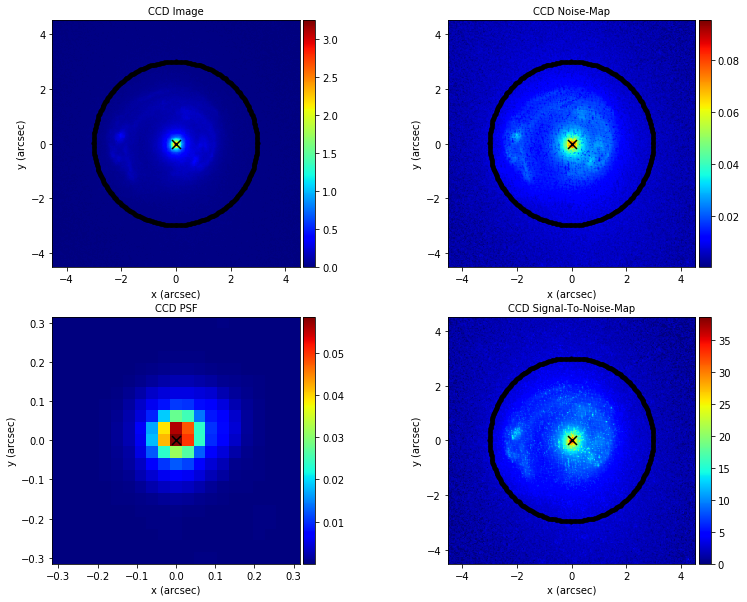

In [8]:
from autolens.data import ccd
from workspace.pipelines.examples.lens_light_and_x1_source_parametric import make_lens_light_and_x1_source_parametric_pipeline

image_path = path + '/data/example/' + lens_name + '/image.fits'
psf_path = path + '/data/example/' + lens_name + '/psf.fits'
noise_map_path = path + '/data/example/' + lens_name + '/noise_map.fits'

ccd_data = ccd.load_ccd_data_from_fits(image_path=image_path, psf_path=psf_path, noise_map_path=noise_map_path,
                                       pixel_scale=0.03)

pipeline = make_lens_light_and_x1_source_parametric_pipeline(pipeline_path='example/' + lens_name)

Now we run the pipeline on the data to get the result. If a mask was supplied to the pipeline when it was run, it is important the same mask is supplied in this run statement.

The skip_optimizer boolean flag means that the non-linear searches will not run, and visualization will be skipped. This ensures the running of the pipeline is fast.

In [ ]:
result = pipeline.run(data=ccd_data, skip_optimizer=True)